## Интеллектуальный анализ данных – весна 2023
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


In [18]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [19]:
X.isnull().sum().sum() != 0

False

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [20]:
from sklearn.model_selection import train_test_split

np.random.seed(69)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [22]:
normalizer = StandardScaler()
normalizer.fit(X_train)

X_train_transformed = pd.DataFrame(data=normalizer.transform(X_train))[[0, 4]]
X_test_transformed = pd.DataFrame(data=normalizer.transform(X_test))[[0, 4]]

counts = [1, 3, 5, 10, 15, 25]
clfs = []
print("NN\tTrain\tTest\t")
for i in counts:
  clf = KNeighborsClassifier(n_neighbors=i, p=2, n_jobs=10)
  clf.fit(X_train_transformed, y_train)
  clfs.append(clf)
  y_predicted_train = clf.predict(X_train_transformed )
  y_predicted_test = clf.predict(X_test_transformed)
  print(f"{i}\t{np.mean(y_train == y_predicted_train):.2f}\t{np.mean(y_test == y_predicted_test):.2f}")

NN	Train	Test	
1	1.00	0.63
3	0.77	0.72
5	0.77	0.67
10	0.77	0.67
15	0.73	0.65
25	0.73	0.70


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [23]:
!pip install mlxtend==0.19.00

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [24]:
import mlxtend

In [25]:
#%pip install mlxtend --upgrade
#!pip install mlxtend==0.19.00

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

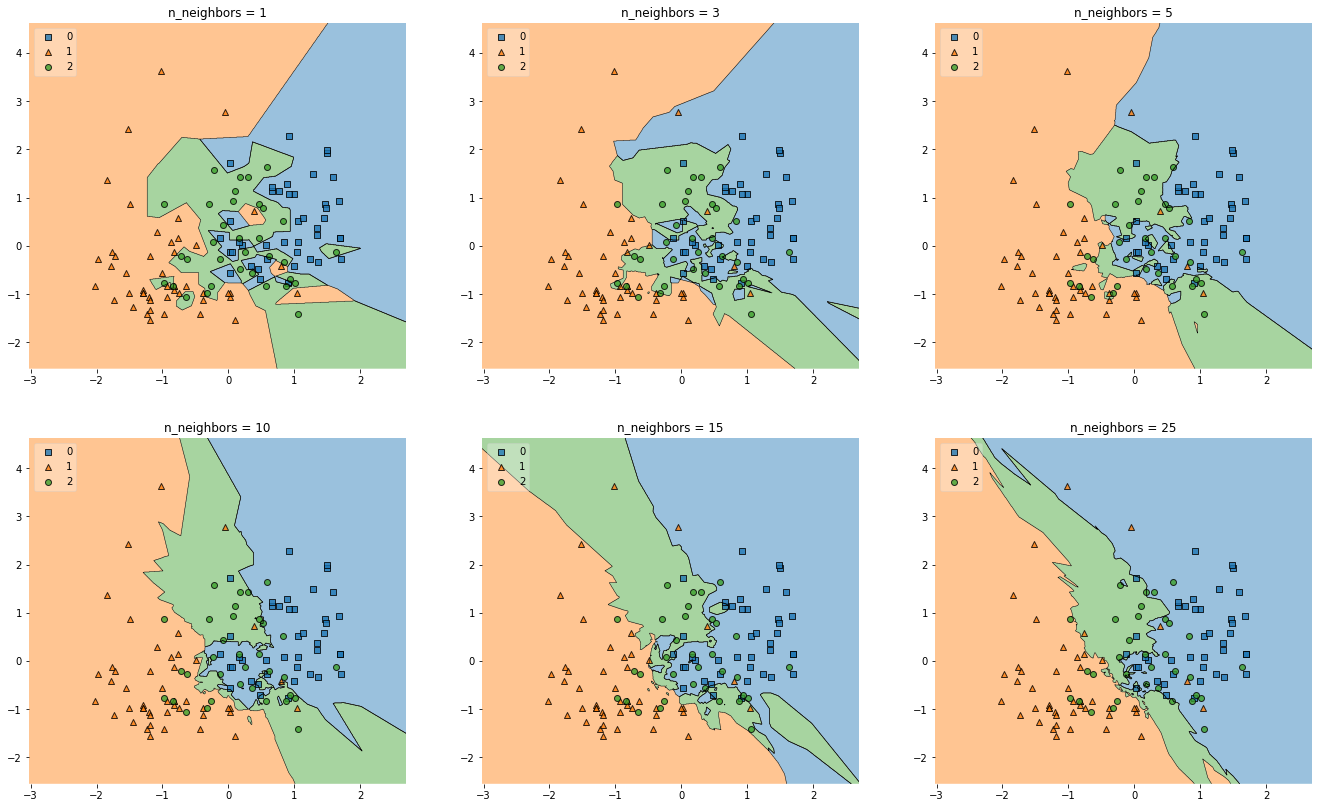

In [26]:
from mlxtend.plotting import plot_decision_regions
import itertools
import matplotlib.gridspec as gridspec

gr = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(23,14))

X_train_transformed_np = X_train_transformed.to_numpy()
for i, clf, grid in zip(counts,
                        clfs,
                        itertools.product([0, 1, 2], repeat=2)):
  ax = plt.subplot(gr[grid[0], grid[1]])
  fig = plot_decision_regions(X=X_train_transformed_np, y=y_train, clf=clf, legend=2)
  plt.title(f"n_neighbors = {i}")

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

Смотря на графики, можно отметить, что при n = 1, модель переобучилась, и подогнала области под каждый элемент, что говорит о ее неоптимальности. При увеличении гиперпараметра можно заметить, что границы областей становятся все плавненее, модель все меньше подгоняется под тренировочную выборку. Смотря на графики, мне кажется, что 25 - оптимальное число соседей, так как оно показывает самое плавное разделение на области, и учитывая, что у нас есть всего 178 элементов, то 25 адекватное число соседей из 178 (если бы у нас было 25 соседей из 25 элементов, то можно сказать что наша модель работала бы наугад, что не внушает доверя к ее точности)

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

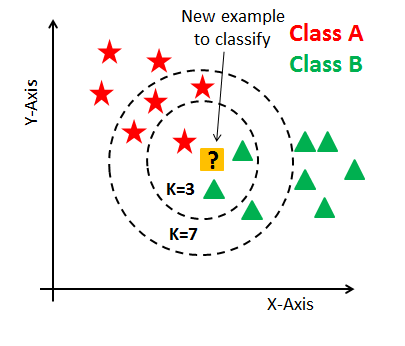

In [27]:
import numpy as np
from collections import Counter 
import math

class KNN:
    def __init__(self, k):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X_test):
        predictions = []
        for x_test in X_test:
            i = 0
            distances = []
            for x in self.X_train:
                distance = math.sqrt(np.sum((x - x_test) ** 2))
                distances.append([i, distance])
                i += 1
            k_distances = sorted(distances, key=lambda d: d[1])[:self.k]
            k_neighbors = [self.y_train[d[0]] for d in k_distances]
            predictions.append(Counter(k_neighbors).most_common(1)[0][0])
        return np.array(predictions)

In [28]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [29]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [30]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [31]:
data.isnull().sum().sum() != 0

False

In [32]:
data.describe() 
# можно заметить, что в столбцах x, y, z есть значения 0 => можно считать их пропусками

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [33]:
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [34]:
data = data.loc[data['x'] != 0.0]
data = data.loc[data['y'] != 0.0]
data = data.loc[data['z'] != 0.0]
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [35]:
data = data.drop('Unnamed: 0', axis=1) # так как это столбец содержит номер строки в таблице, то он не несет никакой доп информации

**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [36]:
data.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028259,0.181646,0.921592,0.977779,0.953991,0.961048
depth,0.028259,1.000000,-0.295733,-0.010729,-0.025017,-0.029069,0.095023
table,0.181646,-0.295733,1.000000,0.127245,0.196097,0.184493,0.152483
price,0.921592,-0.010729,0.127245,1.000000,0.887231,0.867864,0.868206
x,0.977779,-0.025017,0.196097,0.887231,1.000000,0.974918,0.975435
y,0.953991,-0.029069,0.184493,0.867864,0.974918,1.000000,0.956744
z,0.961048,0.095023,0.152483,0.868206,0.975435,0.956744,1.000000


Больше всего с целевой переменной корелирует carat, что является весом бриллианта. После веса хорошо коррелируют с ценой размеры бриллианта x, y, z, но что важнее, x, y, z очень хорошо коррелируют с carat (весом), что тоже очень понятно. 

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [37]:
df = pd.get_dummies(data, drop_first=True)
df.head(5)

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [38]:
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [39]:
X_train

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
26819,2.48,61.0,60.0,8.68,8.61,5.27,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
36589,0.33,61.7,55.0,4.47,4.48,2.76,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
44305,0.53,61.4,58.0,5.24,5.19,3.20,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
20204,1.35,63.1,56.0,6.95,7.03,4.41,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
9432,1.06,62.7,58.0,6.48,6.50,4.07,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21690,0.34,62.4,59.0,4.40,4.44,2.76,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
790,0.66,61.0,58.0,5.67,5.57,3.43,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
48914,0.58,61.5,61.9,5.30,5.34,3.27,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
30438,0.32,61.9,55.0,4.37,4.38,2.71,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [40]:
float_features_mask = ((X_train.dtypes == "float")).values
X_train_float = X_train[X_train.columns[float_features_mask]]
X_train_non_float = X_train[X_train.columns[~float_features_mask]]

float_features_mask = ((X_test.dtypes == "float")).values
X_test_float = X_test[X_test.columns[float_features_mask]]
X_test_non_float = X_test[X_test.columns[~float_features_mask]]


In [41]:
from sklearn.compose import ColumnTransformer

normalizer = StandardScaler()
normalizer.fit(X_train_float)
#normalizer.fit(X_train)

X_train_float_transformed = normalizer.transform(X_train_float)
X_test_float_transformed = normalizer.transform(X_test_float)

X_train_transformed = pd.DataFrame(data=np.append(X_train_float_transformed, X_train_non_float, axis = 1))
X_test_transformed = pd.DataFrame(data=np.append(X_test_float_transformed, X_test_non_float, axis = 1))


##X_train_transformed = pd.DataFrame(data=normalizer.transform(X_train))
#X_test_transformed =pd.DataFrame(data=normalizer.transform(X_test))

X_train_transformed

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,3.533756,-0.521871,1.140581,2.625066,2.486111,2.437384,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.986346,-0.032078,-1.095882,-1.126688,-1.089397,-1.102441,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.565871,-0.241989,0.245996,-0.440500,-0.474721,-0.481914,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.158075,0.947507,-0.648590,1.083372,1.118241,1.224535,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.548387,0.667625,0.245996,0.664530,0.659399,0.745037,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37739,-0.965322,0.457714,0.693288,-1.189068,-1.124027,-1.102441,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
37740,-0.292563,-0.521871,0.245996,-0.057304,-0.145740,-0.157547,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
37741,-0.460752,-0.172019,1.990437,-0.387031,-0.344860,-0.383194,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
37742,-1.007369,0.107862,-1.095882,-1.215803,-1.175971,-1.172955,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train_transformed, y_train)

train_predictions = lr.predict(X_train_transformed)
test_predictions = lr.predict(X_test_transformed)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

df = pd.DataFrame({'MSE': [round(train_mse,2), round(test_mse,2)]})
df.index = ['Тренировочная выборка', 'Тестовая выборка']
df

,MSE
Тренировочная выборка,1295183.91
Тестовая выборка,1214270.94


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [43]:
coef_df = pd.DataFrame({'coefficient': lr.coef_})
coef_df.index = X.columns
coef_df

,coefficient
carat,5463.391442
depth,-100.528749
table,-60.971332
x,-1215.613945
y,13.604854
z,-57.878499
cut_Good,553.217990
cut_Ideal,797.803206
cut_Premium,717.536722
cut_Very Good,681.556369


Смотря на коэффициенты нельзя выедлить какого-либо лидера. Можно заметить, что carat имеет самый больщий вес, а color_J самый маленький. Видимо цена больше всего зависит от веса (карат), а бриллиант цвета J имеет менььшую стоимость в сравнение с бриллиантами тех же параметров но других цветов.

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [44]:
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso(alpha=10)
lasso.fit(X_train_transformed, y_train)

mse_train_lasso = mean_squared_error(y_train, lasso.predict(X_train_transformed))
mse_test_lasso = mean_squared_error(y_test, lasso.predict(X_test_transformed))

ridge = Ridge(alpha=10)
ridge.fit(X_train_transformed, y_train)

mse_train_ridge = mean_squared_error(y_train, ridge.predict(X_train_transformed))
mse_test_ridge = mean_squared_error(y_test, ridge.predict(X_test_transformed))

coef_lasso = pd.DataFrame({"coefficient": lasso.coef_})
coef_lasso.index = X.columns
coef_ridge = pd.DataFrame({"coefficient": ridge.coef_})
coef_ridge.index = X.columns

print("Значения MSE")
df = pd.DataFrame({'Тренировочная выборка': [round(mse_train_lasso,2), round(mse_train_ridge,2)], 'Тестовая выборка': [round(mse_test_lasso,2), round(mse_test_ridge,2)]})
df.index = ['Lasso', 'Ridge']
df

Значения MSE


,Тренировочная выборка,Тестовая выборка
Lasso,1541950.74,1424091.54
Ridge,1299775.84,1209068.02


In [45]:
print("Коэффициенты в Lasso")
coef_lasso

Коэффициенты в Lasso


,coefficient
carat,4799.074021
depth,-152.530913
table,-107.145459
x,-671.878437
y,-0.000000
z,-53.612125
cut_Good,-0.000000
cut_Ideal,162.166173
cut_Premium,61.539173
cut_Very Good,69.090809


Веса немного уменьшились, можно увидеть обнулившиеся признаки. Можно заметить, что x,y,z - размеры, поэтому вес и так уже должен зависить от этих параметров (о чем так же говорить таблица корреляций), что говорит о порблеме мультиколлинеарности. Видно, что веса при x,y,z уменьшились, что уменьшило проблему мультиколлинеарности

In [46]:
print("Коэффициенты в Ridge")
coef_ridge

Коэффициенты в Ridge


,coefficient
carat,5399.677495
depth,-102.323492
table,-63.931981
x,-1161.614177
y,14.167976
z,-62.241325
cut_Good,579.372435
cut_Ideal,829.796532
cut_Premium,746.396483
cut_Very Good,715.535553


Веса совсем чуть-чуть уменьшились.

Смотря на x,y,z можно заметить, что коэфф при этих признаках не особо поменялись, что говорит о том, что проблема мультиколлениарности не была решена.

Возможно alpha = 10 не подходит

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

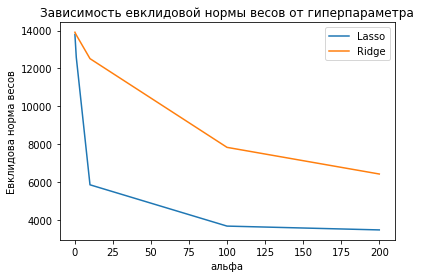

In [47]:
l = []
r = []
alphas = [0.1, 1, 10, 100, 200]

for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train_transformed, y_train)
    l.append(np.linalg.norm(lasso.coef_))

    ridge = Ridge(alpha=a)
    ridge.fit(X_train_transformed, y_train)
    r.append(np.linalg.norm(ridge.coef_))

plt.title("Зависимость евклидовой нормы весов от гиперпараметра")

plt.xlabel("альфа")
plt.ylabel("Евклидова норма весов")

plt.plot(alphas, l, label="Lasso")
plt.plot(alphas, r, label="Ridge")

plt.legend()
plt.show()

Смотря на графики, очевидно, что Lasso агресивнее уменьшает веса, так как его график в итоге имеет больший диапазон значений. Lasso-регрессию часто используют для отбора признаков, потому что в результате уменьшение весов она может обнулить некоторе признаки, поэтому можно понять, что оставшиеся признаки имеют большее влияение на целевую переменную.

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [48]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X_train_transformed, y_train)

alpha = 0
i = 0
min = math.inf
for a in lasso_cv.alphas_:
    mean_mse = np.mean(lasso_cv.mse_path_[i])
    i += 1
    if mean_mse < min:
        alpha = a
        min = mean_mse
        

print(f"Лучший альфа: {alpha}")

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50355067.45300293, tolerance: 48534866.70114574
  model = cd_fast.enet_coordinate_descent_gram(


Лучший альфа: 0.1


**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [49]:
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_transformed, y_train)

coef_lasso = pd.DataFrame({"coefficient": lasso.coef_})
coef_lasso.index = X.columns
coef_lasso

,coefficient
carat,5456.262335
depth,-101.395397
table,-61.610947
x,-1208.117660
y,11.288840
z,-57.452462
cut_Good,542.826397
cut_Ideal,787.845031
cut_Premium,707.431059
cut_Very Good,672.070571


Наиболее информативными признаками оакзались carat и признаки чистоты бриллианта (clarity). Видно, что изначально clarity можно было считать порядковым признаком, и получивщиеся веса отражают порядок, который подразумевался в clarity. Можно понять, что лучшая чистота (clarity_IF) больше влияет на цену, чем остальные.

Аналогично порядковый признак Cut остался порядковым, по получившимся весам можно выстроить тот же порядок. По весам цветов можно сделать вывод, что от них цена не увеличивается, но какие-то цвета хуже других.

Самыми неинформативными оказались размеры x,y,z, так как они уже учитаны в carat, что было решено при решении проблемы мультиколлинеарности. Так же мало информации дают признаки depth и table, чье описание даже трудно понять.

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [50]:
mse_test_lasso = mean_squared_error(y_test, lasso.predict(X_test_transformed))

dif =((test_mse - mse_test_lasso) / test_mse) * 100
print("Разница между MSE в процентах: " + str(round(dif,2)) + "%")

df = pd.DataFrame({'MSE': [round(test_mse,2), round(mse_test_lasso,2)]})
df.index = ['Линейная регрессия', 'Lasso-регрессия']
df

Разница между MSE в процентах: 0.08%


,MSE
Линейная регрессия,1214270.94
Lasso-регрессия,1213347.40


Так как Lasso-регрессия показала меньший MSE, то стоит выбирать ее для предсказаний